##  Question::::Use Random Forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets,tree


import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
 
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')


## __1 - Business Problem__  
___Use Random Forest to prepare a model on fraud data___  

## __2 - Data collection and description__ 

In [3]:
df = pd.read_csv("Fraud_check (1).csv")

In [4]:
df1 = df.copy()

In [5]:
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [41]:
df1.isnull().sum()

Taxable.Income             0
City.Population            0
Work.Experience            0
Undergrad_NO               0
Undergrad_YES              0
Marital.Status_Divorced    0
Marital.Status_Married     0
Marital.Status_Single      0
Urban_NO                   0
Urban_YES                  0
dtype: int64

In [6]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


In [7]:
df1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [8]:
df1.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

### Outlier Check

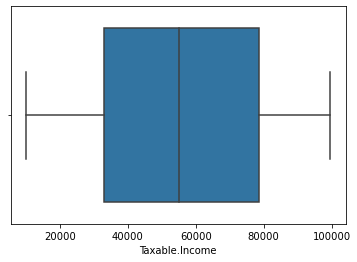

In [9]:
ax = sns.boxplot(df1['Taxable.Income'])

### There are no outliers in the data

In [10]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


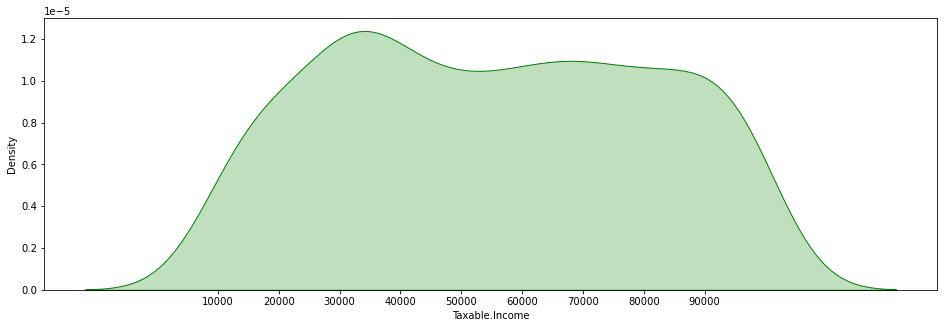

In [11]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['Taxable.Income'].skew()))
print("Kurtosis: {}".format(df1['Taxable.Income'].kurtosis()))
ax = sns.kdeplot(df1['Taxable.Income'],shade=True,color='g')
plt.xticks([i for i in range(10000,100000,10000)])
plt.show()

### The data is Skwed on the right  
### The data has negative Kurtosis

In [12]:
obj_colum = df1.select_dtypes(include='object').columns.tolist()

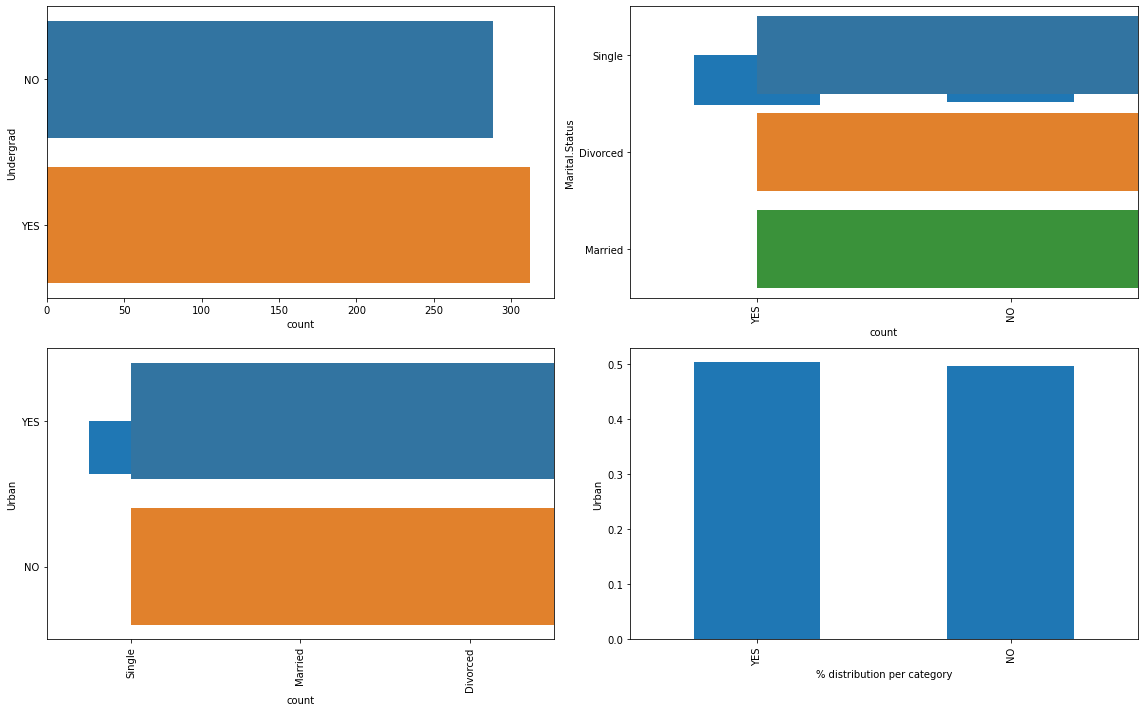

In [13]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df1,y=col)
    plt.subplot(2,2,i+1)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

In [14]:
num_columns = df1.select_dtypes(exclude='object').columns.tolist()

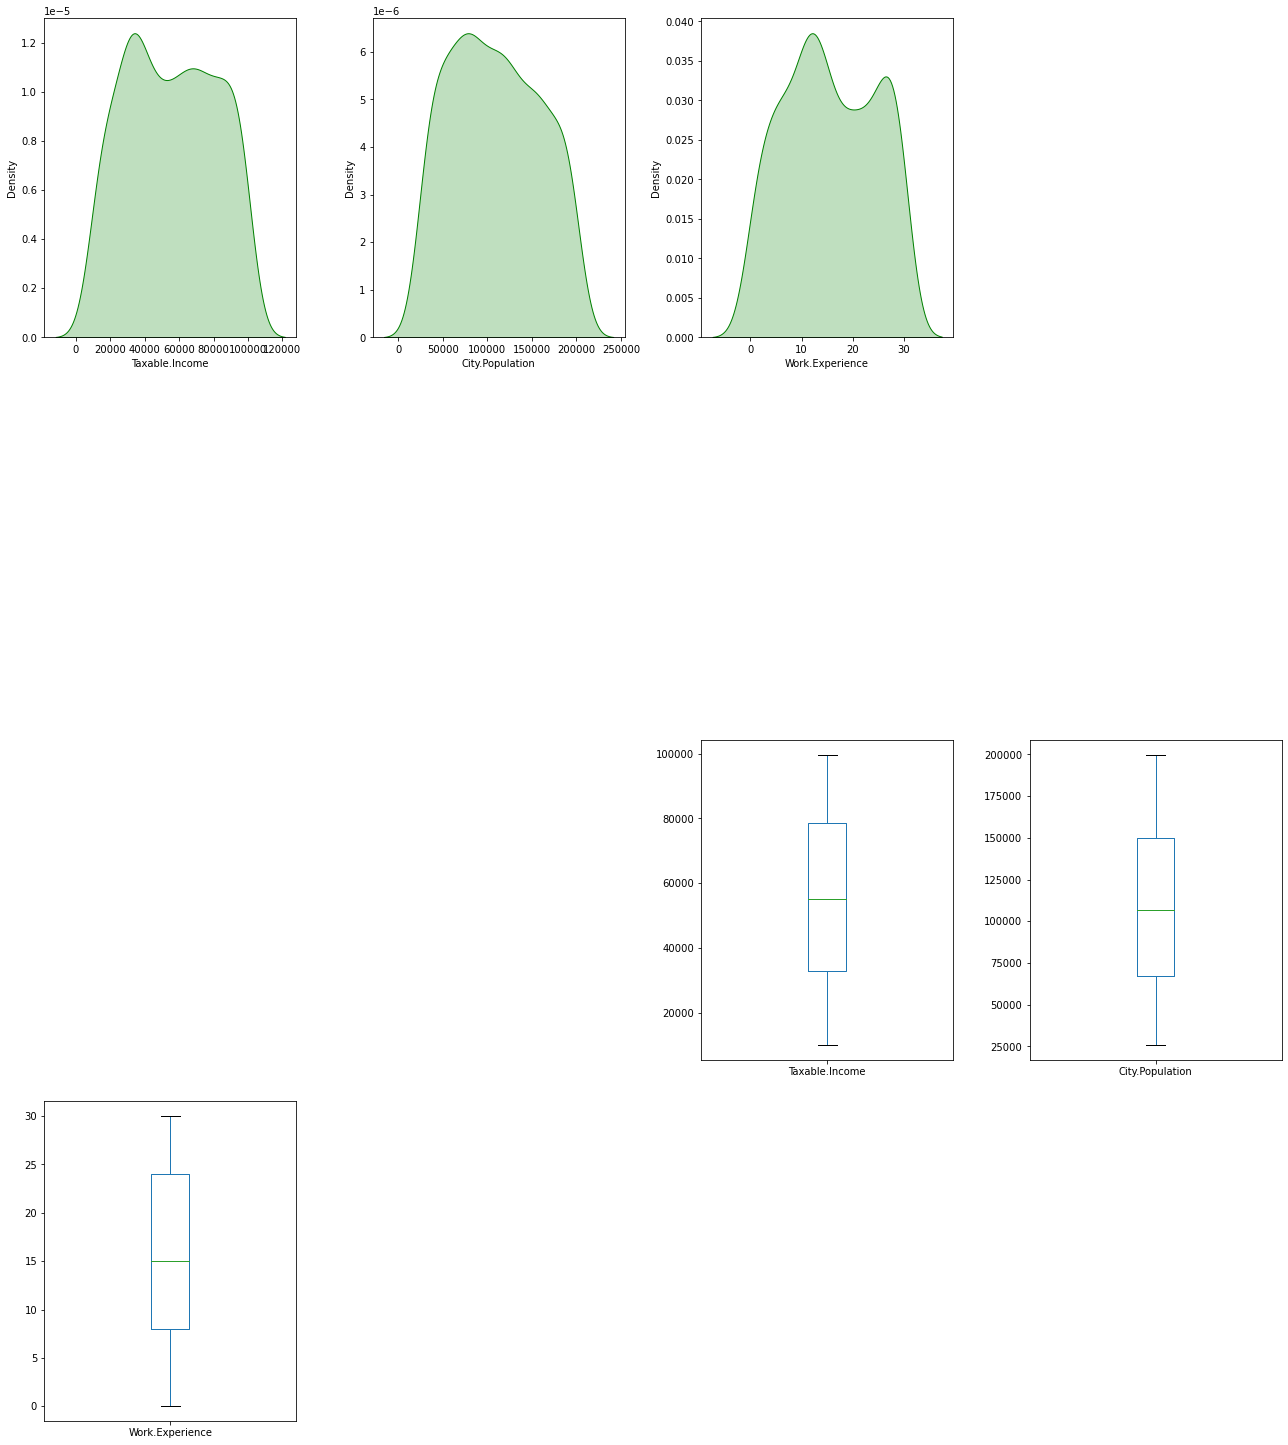

,Taxable.Income,City.Population,Work.Experience
skewness,0.030015,0.125009,0.018529
kurtosis,-1.199782,-1.120154,-1.167524


In [15]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [16]:
df1 = pd.get_dummies(df1, columns = ['Undergrad','Marital.Status','Urban'])

In [17]:
corr = df1.corr()

In [18]:
corr = df1.corr()

<AxesSubplot:>

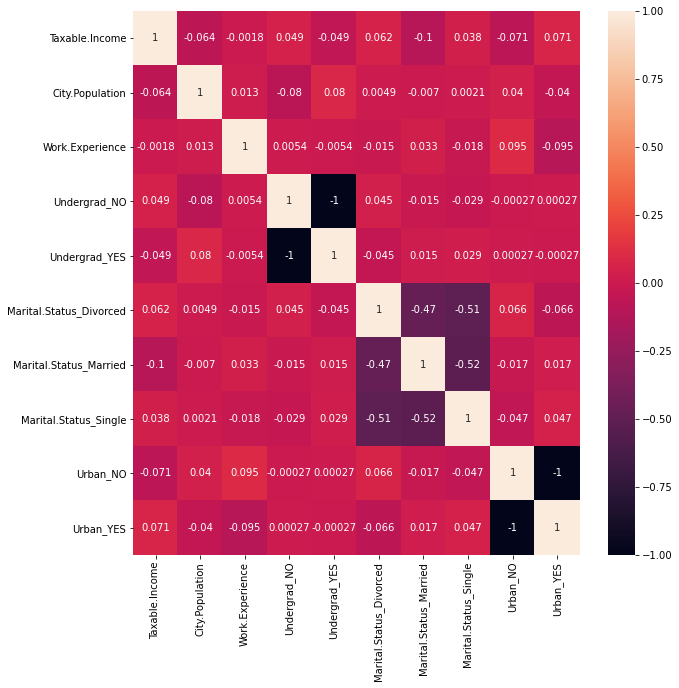

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

## __3 - Random Forest Model__ 

### Since the target variable is continious, we create a class of taxable_income <= 30000 as "Risky" and others are "Good"   

In [20]:
df1['Taxable.Income']=pd.cut(df1['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

In [21]:
list(df1.columns)

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [22]:
X = df1.iloc[:,1:10]
y = df1.iloc[:,0]

In [23]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [24]:
y_train.value_counts()

good     386
risky     94
Name: Taxable.Income, dtype: int64

In [25]:
random_model =RF(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='gini') 
random_model.fit(x_train,y_train)
print(random_model.oob_score_)

0.7604166666666666


## Training Data

In [26]:
pred_train = random_model.predict(x_train)

In [27]:
accuracy_score(y_train,pred_train)

1.0

In [28]:
confusion_matrix(y_train,pred_train)

array([[386,   0],
       [  0,  94]], dtype=int64)

## Testing  DATA

In [29]:
pred_test = random_model.predict(x_test)

In [30]:
accuracy_score(y_test,pred_test)

0.6833333333333333

In [31]:
confusion_matrix(y_test,pred_test)

array([[80, 10],
       [28,  2]], dtype=int64)

In [32]:
df_testing=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [33]:
df_testing.head()

,Actual,Predicted
73,good,good
77,good,risky
175,good,good
390,good,good
435,good,good


In [34]:
df_testing.value_counts()

Actual  Predicted
good    good         80
risky   good         28
good    risky        10
risky   risky         2
dtype: int64

## __4 - Conclusion__ 

### Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 74%  
### As seen in the confusion matrix of Test data 96 instances are presdected correctly and 24 instances are not

In [35]:
random_model.feature_importances_

array([0.51817586, 0.34323407, 0.01872024, 0.01992322, 0.01898546,
       0.02097138, 0.0194072 , 0.02059717, 0.0199854 ])

In [38]:
features = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': random_model.feature_importances_}).\
                    sort_values('importance', ascending = True)

In [39]:
features

,feature,importance
2,Undergrad_NO,0.018720
4,Marital.Status_Divorced,0.018985
6,Marital.Status_Single,0.019407
3,Undergrad_YES,0.019923
8,Urban_YES,0.019985
7,Urban_NO,0.020597
5,Marital.Status_Married,0.020971
1,Work.Experience,0.343234
0,City.Population,0.518176


### As seen in the above table city population is most important feature

## ==============The END============================